<a href="https://colab.research.google.com/github/eliottdouieb/mat0/blob/main/This_is_the_final_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
# from tensorflow.keras.models import Sequential, Model
from keras.layers import Dropout
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
import random
from google.colab import drive
drive.mount('/content/drive')
directory = """/content/drive/MyDrive/project_data_mining/Img/"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv('/content/drive/MyDrive/project_data_mining/english.csv')
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [3]:
df['image'] = df['image'].map(lambda x: x.lstrip('Img/'))
df.head()

,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0


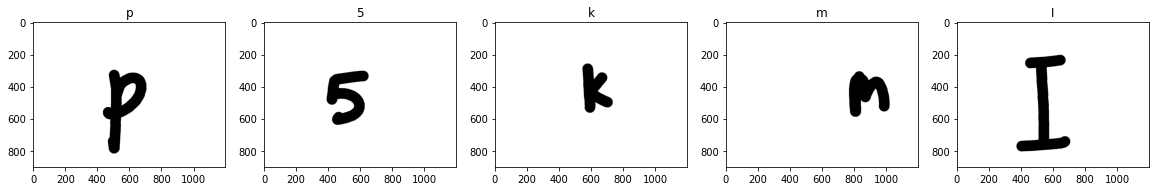

In [4]:
plt.figure(figsize=(20,20))
# test_folder=r''
for i in range(5):
    file = random.choice(os.listdir(directory))
    image_path= os.path.join(directory, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(df.loc[df['image'] == file, 'label'].iloc[0])
    plt.imshow(img)

In [5]:
df_numbers=df[df["label"].str.isdigit()]
print(len(df_numbers))
df_numbers

550


,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0
...,...,...
545,img010-051.png,9
546,img010-052.png,9
547,img010-053.png,9
548,img010-054.png,9


In [6]:
df_letters=df[df["label"].str.isalpha()]
print(len(df_letters))
df_letters

2860


,image,label
550,img011-001.png,A
551,img011-002.png,A
552,img011-003.png,A
553,img011-004.png,A
554,img011-005.png,A
...,...,...
3405,img062-051.png,z
3406,img062-052.png,z
3407,img062-053.png,z
3408,img062-054.png,z


In [7]:
def create_dataset(data,img_folder,isletters):
   
  img_data_array=[]
  class_name=[]
   
  for file in os.listdir(img_folder):
    if file in data['image'].values:
      image_path= os.path.join(img_folder, file)
      # image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
      image= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
      image=np.array(image)
      image = image.astype('float32')
      image /= 255
      img_data_array.append(image)
      if isletters:
        class_name.append(data.loc[data['image'] == file, 'label'].iloc[0].upper())
      else:
        class_name.append(data.loc[data['image'] == file, 'label'].iloc[0])
  return img_data_array, class_name

In [8]:
IMG_WIDTH=64
IMG_HEIGHT=64

In [9]:
# extract the image array and class name
img_data_numbers, class_name_numbers =create_dataset(df_numbers, directory, False)

In [10]:
# extract the image array and class name
img_data_letters, class_name_letters =create_dataset(df_letters, directory, True)

In [11]:
len(img_data_numbers)

550

In [12]:
len(img_data_letters)

2860

In [13]:
label_dict_numbers={k: v for v, k in enumerate(np.unique(class_name_numbers))}
label_dict_letters={k: v for v, k in enumerate(np.unique(class_name_letters))}
#label_dict

In [14]:
labels_numbers=  [label_dict_numbers[class_name_numbers[i]] for i in range(len(class_name_numbers))]
labels_letters=  [label_dict_letters[class_name_letters[i]] for i in range(len(class_name_letters))]
#labels

In [47]:
label_dict_letters

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [15]:
seed = np.random.randint(0, 100000)  
np.random.seed(seed)  
np.random.shuffle(img_data_letters)
np.random.seed(seed)  
np.random.shuffle(class_name_letters)
np.random.seed(seed)  
np.random.shuffle(labels_letters)
np.random.seed(seed)  
np.random.shuffle(img_data_numbers)
np.random.seed(seed)  
np.random.shuffle(class_name_numbers)
np.random.seed(seed)  
np.random.shuffle(labels_numbers)

In [16]:
X_train_letters, X_test_letters, Y_train_letters, Y_test_letters = train_test_split(img_data_letters, labels_letters, test_size=0.2, random_state=0, stratify=labels_letters)
X_train_numbers, X_test_numbers, Y_train_numbers, Y_test_numbers = train_test_split(img_data_numbers, labels_numbers, test_size=0.2, random_state=0, stratify=labels_numbers)

In [17]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

datagen = ImageDataGenerator(rotation_range=20)

X_train_numbers= np.array(X_train_numbers)
datagen.fit(X_train_numbers.reshape(440, 64, 64, 1))

# img_data_numbers_rot = ImageDataGenerator(rotation_range=20)
# X_train_numbers= img_data_numbers_rot.fit(X_train_numbers)

In [18]:
datagen = ImageDataGenerator(rotation_range=20)

X_train_letters= np.array(X_train_letters)
datagen.fit(X_train_letters.reshape(2288, 64, 64, 1))

CNN Numbers

In [19]:
model_numbers = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model_numbers.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model_numbers.add(layers.MaxPooling2D((2, 2)))
model_numbers.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_numbers.add(layers.MaxPooling2D((2, 2)))
model_numbers.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_numbers.add(Dropout(0.8))

In [20]:
model_numbers.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0

In [21]:
model_numbers.add(layers.Flatten())
model_numbers.add(Dropout(0.8))
model_numbers.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(62))
model_numbers.add(layers.Dense(10))

In [22]:
model_numbers.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# import tensor as tf
# X_train_numbers = tf.convert_to_tensor(X_train_numbers)
# Y_train_numbers = tf.convert_to_tensor(Y_train_numbers)
# X_test_numbers = tf.convert_to_tensor(X_test_numbers)
# Y_test_numbers = tf.convert_to_tensor(Y_test_numbers)

X_train_numbers= np.array(X_train_numbers)
Y_train_numbers= np.array(Y_train_numbers)
X_test_numbers= np.array(X_test_numbers)
Y_test_numbers= np.array(Y_test_numbers)
history_numbers = model_numbers.fit(X_train_numbers, Y_train_numbers, epochs=200, validation_data=(X_test_numbers, Y_test_numbers))

Epoch 1/200
14/14 [==============================] - 3s 49ms/step - loss: 2.3497 - accuracy: 0.1182 - val_loss: 2.3011 - val_accuracy: 0.1091
Epoch 2/200
14/14 [==============================] - 0s 17ms/step - loss: 2.3057 - accuracy: 0.1068 - val_loss: 2.3005 - val_accuracy: 0.1273
Epoch 3/200
14/14 [==============================] - 0s 20ms/step - loss: 2.3134 - accuracy: 0.1114 - val_loss: 2.2975 - val_accuracy: 0.2000
Epoch 4/200
14/14 [==============================] - 0s 17ms/step - loss: 2.3022 - accuracy: 0.1045 - val_loss: 2.2966 - val_accuracy: 0.1455
Epoch 5/200
14/14 [==============================] - 0s 19ms/step - loss: 2.2988 - accuracy: 0.1432 - val_loss: 2.2851 - val_accuracy: 0.1636
Epoch 6/200
14/14 [==============================] - 0s 17ms/step - loss: 2.2905 - accuracy: 0.1159 - val_loss: 2.2691 - val_accuracy: 0.1909
Epoch 7/200
14/14 [==============================] - 0s 17ms/step - loss: 2.2710 - accuracy: 0.1386 - val_loss: 2.2349 - val_accuracy: 0.2727
Epoch 

4/4 - 0s - loss: 0.3448 - accuracy: 0.9273 - 43ms/epoch - 11ms/step


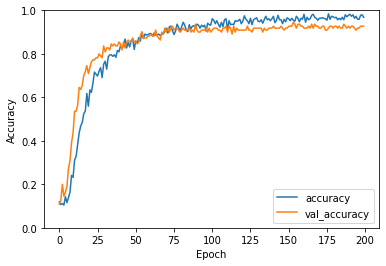

In [23]:
plt.plot(history_numbers.history['accuracy'], label='accuracy')
plt.plot(history_numbers.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_numbers, test_acc_numbers = model_numbers.evaluate(X_test_numbers,  Y_test_numbers, verbose=2)

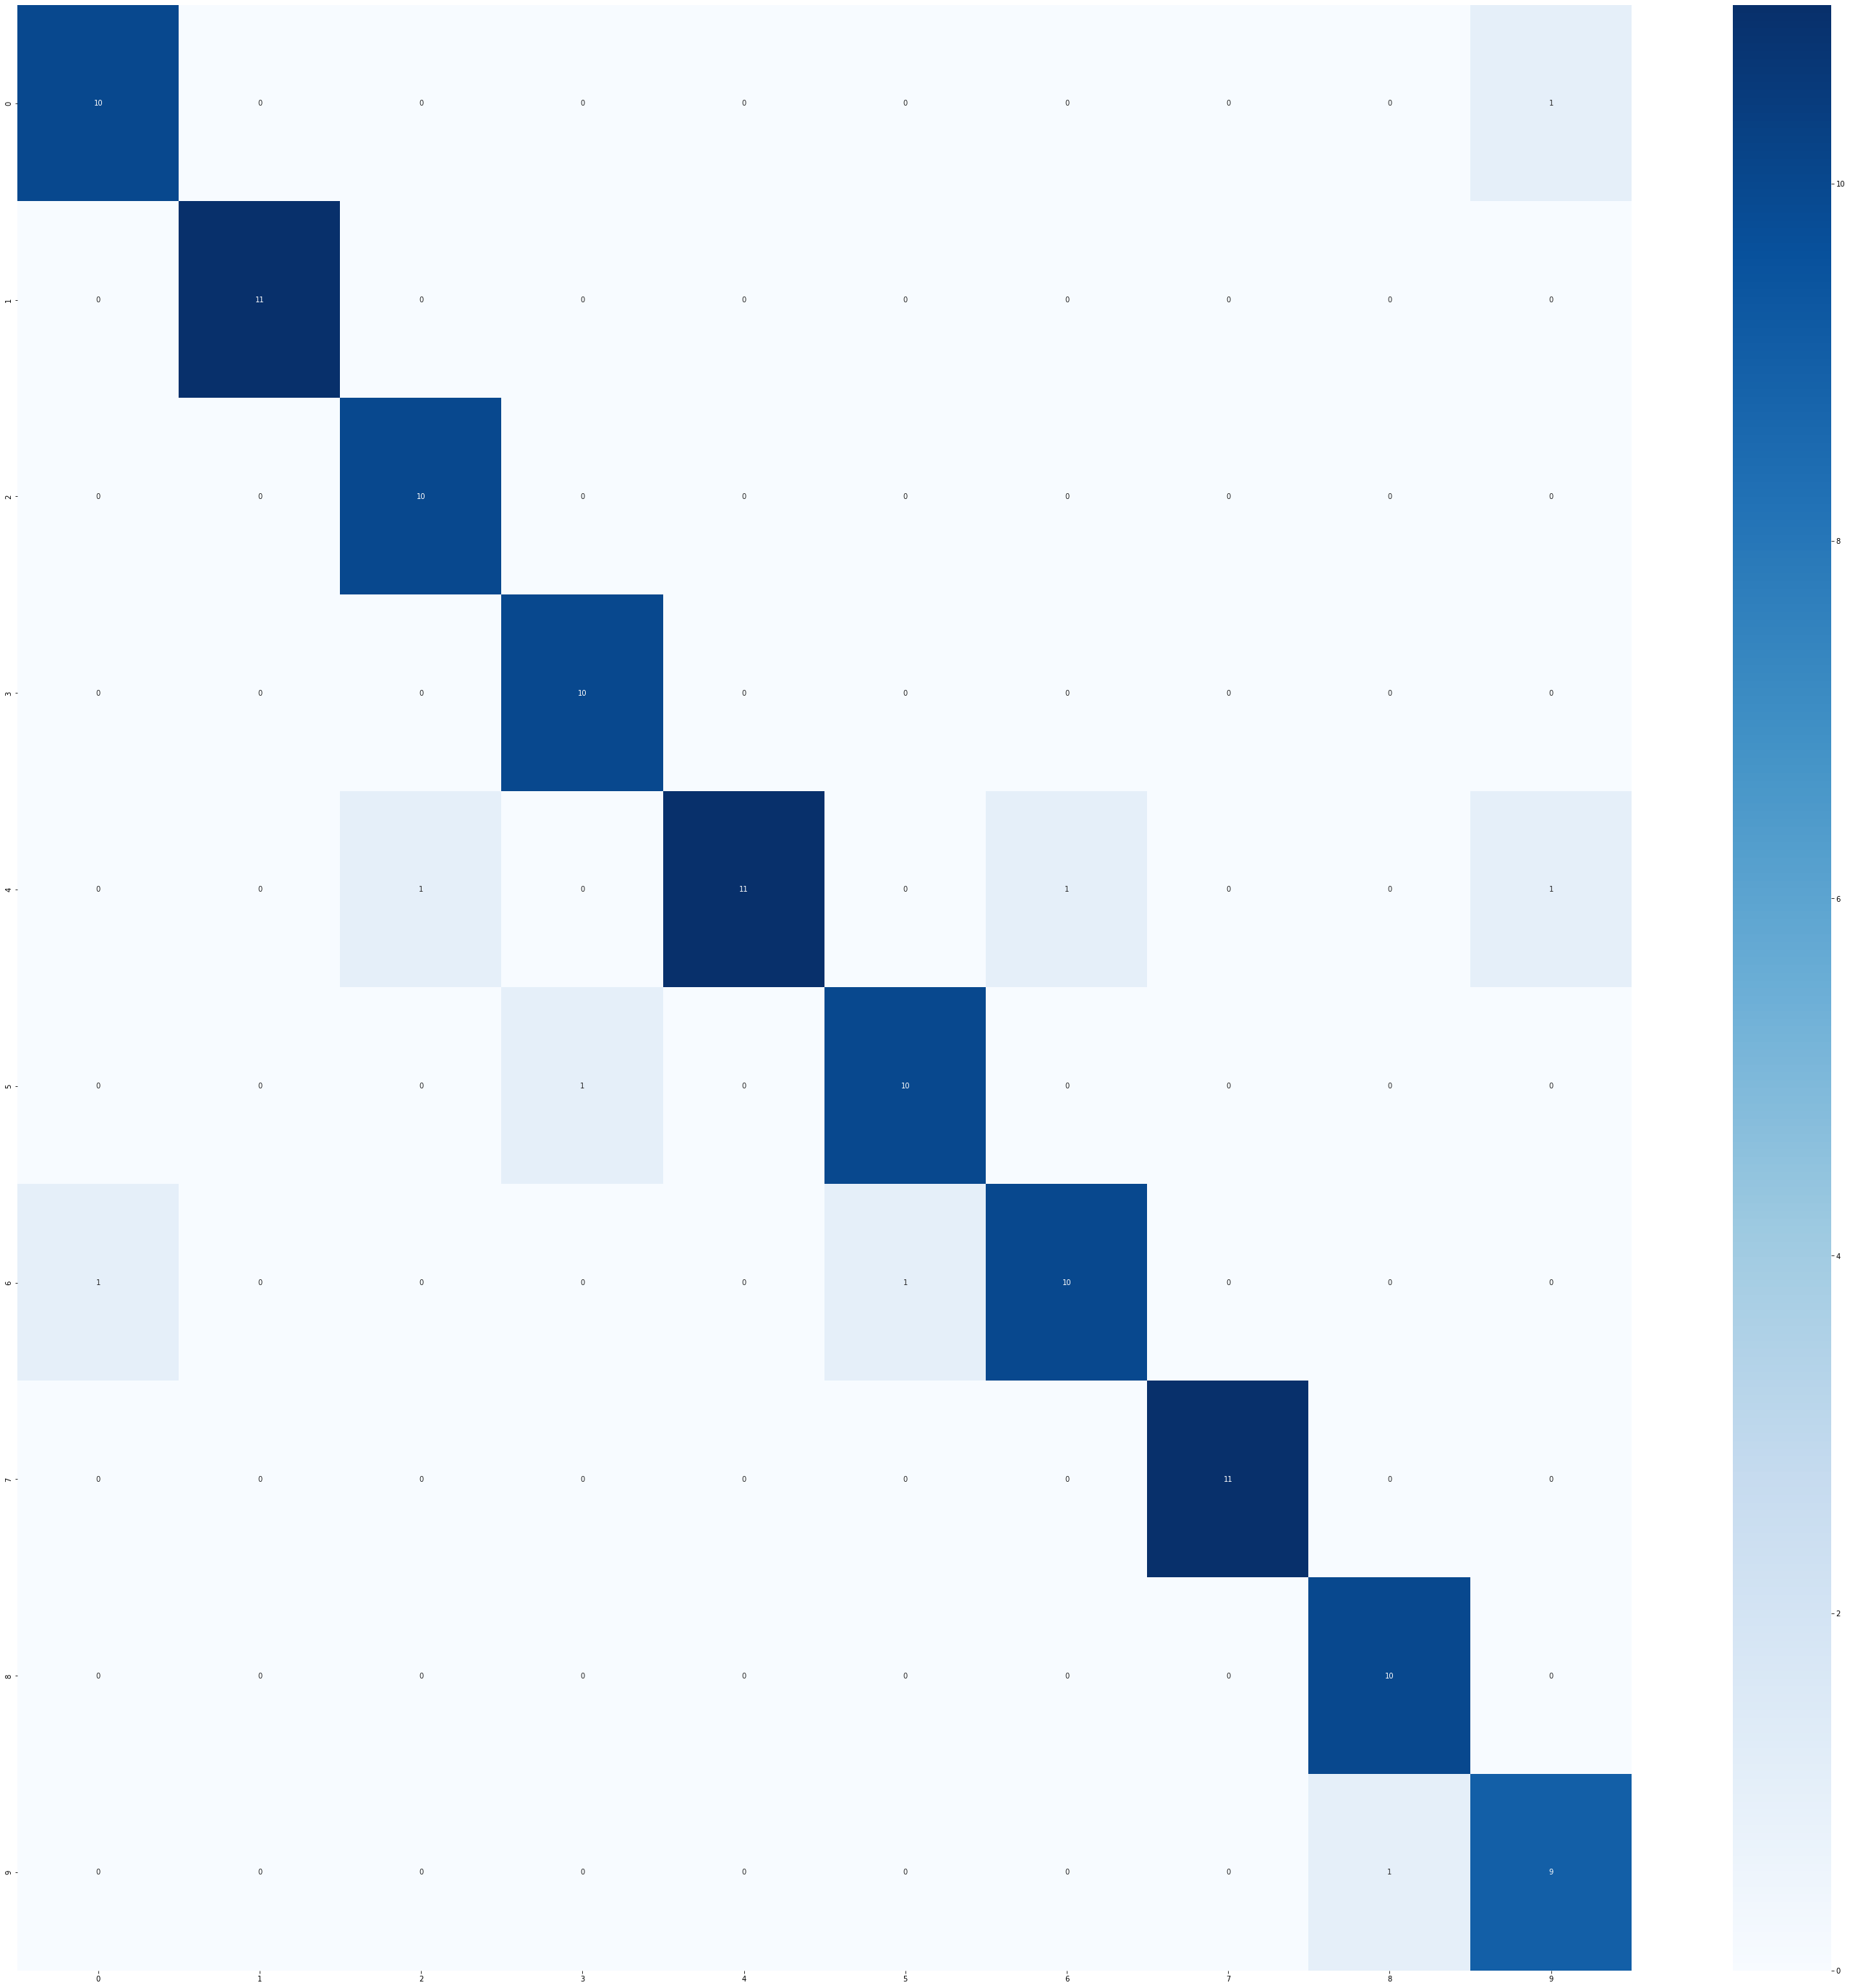

In [24]:
ypred_numbers = model_numbers.predict(X_test_numbers)

shape1_numbers = ypred_numbers.shape[0]
shape2_numbers = ypred_numbers.shape[1]

ypred_numbers = np.argmax(ypred_numbers, axis=1).reshape(shape1_numbers)
ytrue_numbers = Y_test_numbers
ytrue_numbers = np.squeeze(ytrue_numbers).reshape(shape1_numbers)

cf_matrix = confusion_matrix(ypred_numbers, ytrue_numbers)
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(cf_matrix, fmt='.0f', annot=True, cmap='Blues',ax=ax, xticklabels= label_dict_numbers.keys(), yticklabels= label_dict_numbers.keys())

In [25]:
!pip install -q gradio


     |████████████████████████████████| 2.9 MB 5.7 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 253 kB 34.6 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 212 kB 32.2 MB/s 
     |████████████████████████████████| 1.1 MB 40.5 MB/s 
     |████████████████████████████████| 2.0 MB 40.2 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 144 kB 46.9 MB/s 
     |████████████████████████████████| 94 kB 2.3 MB/s 
     |████████████████████████████████| 271 kB 51.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 10.9 MB 31.4 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 856 kB 46.3 MB/s 
     |████████████████████████████████| 62 kB 806 kB/s 
     |████████████████████████

In [30]:
import os
from urllib.request import urlretrieve

import tensorflow as tf

import gradio
import gradio as gr
#create a function to make predictions
#return a dictionary of labels and probabilities
def numbers(img):
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    prediction = model_numbers.predict(img).tolist()[0]
    class_names = ['0','1','2','3','4','5','6','7','8','9']
    return {class_names[i]: prediction[i] for i in range(10)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(IMG_HEIGHT, IMG_HEIGHT), image_mode='L', invert_colors=False, source="canvas")
#setup the interface
iface = gr.Interface(
    fn = numbers, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://56017.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f6ba5a6ce50>,
 'http://127.0.0.1:7864/',
 'https://56017.gradio.app')

CNN Letters

In [31]:
model_letters = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model_letters.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model_letters.add(layers.MaxPooling2D((2, 2)))
model_letters.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_letters.add(layers.MaxPooling2D((2, 2)))
model_letters.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_letters.add(Dropout(0.8))

In [32]:
model_letters.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)       

In [33]:
model_letters.add(layers.Flatten())
model_letters.add(Dropout(0.8))
model_letters.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(62))
model_letters.add(layers.Dense(26))

In [34]:
model_letters.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
X_train_letters= np.array(X_train_letters)
Y_train_letters= np.array(Y_train_letters)
X_test_letters= np.array(X_test_letters)
Y_test_letters= np.array(Y_test_letters)
# history_letters = model_letters.fit(X_train_letters, Y_train_letters, epochs=200, batch_size=32, validation_data=(X_test_letters, Y_test_letters))
history_letters = model_letters.fit(X_train_letters, Y_train_letters, epochs=250, validation_data=(X_test_letters, Y_test_letters))

Epoch 1/250
72/72 [==============================] - 2s 20ms/step - loss: 3.2677 - accuracy: 0.0328 - val_loss: 3.2570 - val_accuracy: 0.0367
Epoch 2/250
72/72 [==============================] - 1s 14ms/step - loss: 3.2589 - accuracy: 0.0337 - val_loss: 3.2490 - val_accuracy: 0.0699
Epoch 3/250
72/72 [==============================] - 1s 14ms/step - loss: 3.2310 - accuracy: 0.0577 - val_loss: 3.1282 - val_accuracy: 0.1538
Epoch 4/250
72/72 [==============================] - 1s 14ms/step - loss: 3.0716 - accuracy: 0.1106 - val_loss: 2.7870 - val_accuracy: 0.2657
Epoch 5/250
72/72 [==============================] - 1s 14ms/step - loss: 2.8297 - accuracy: 0.1735 - val_loss: 2.3022 - val_accuracy: 0.4091
Epoch 6/250
72/72 [==============================] - 1s 13ms/step - loss: 2.4774 - accuracy: 0.2561 - val_loss: 1.9225 - val_accuracy: 0.4720
Epoch 7/250
72/72 [==============================] - 1s 14ms/step - loss: 2.2147 - accuracy: 0.3309 - val_loss: 1.6813 - val_accuracy: 0.5140
Epoch 

In [43]:
Y_train_letters

array([14,  5,  8, ...,  0, 25,  9])

18/18 - 0s - loss: 0.3721 - accuracy: 0.9003 - 132ms/epoch - 7ms/step


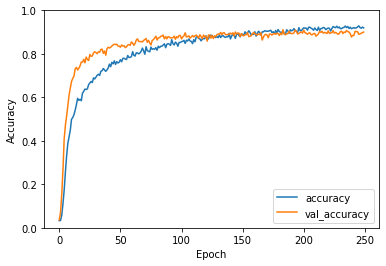

In [35]:
plt.plot(history_letters.history['accuracy'], label='accuracy')
plt.plot(history_letters.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss_letters, test_acc_letters = model_letters.evaluate(X_test_letters,  Y_test_letters, verbose=2)

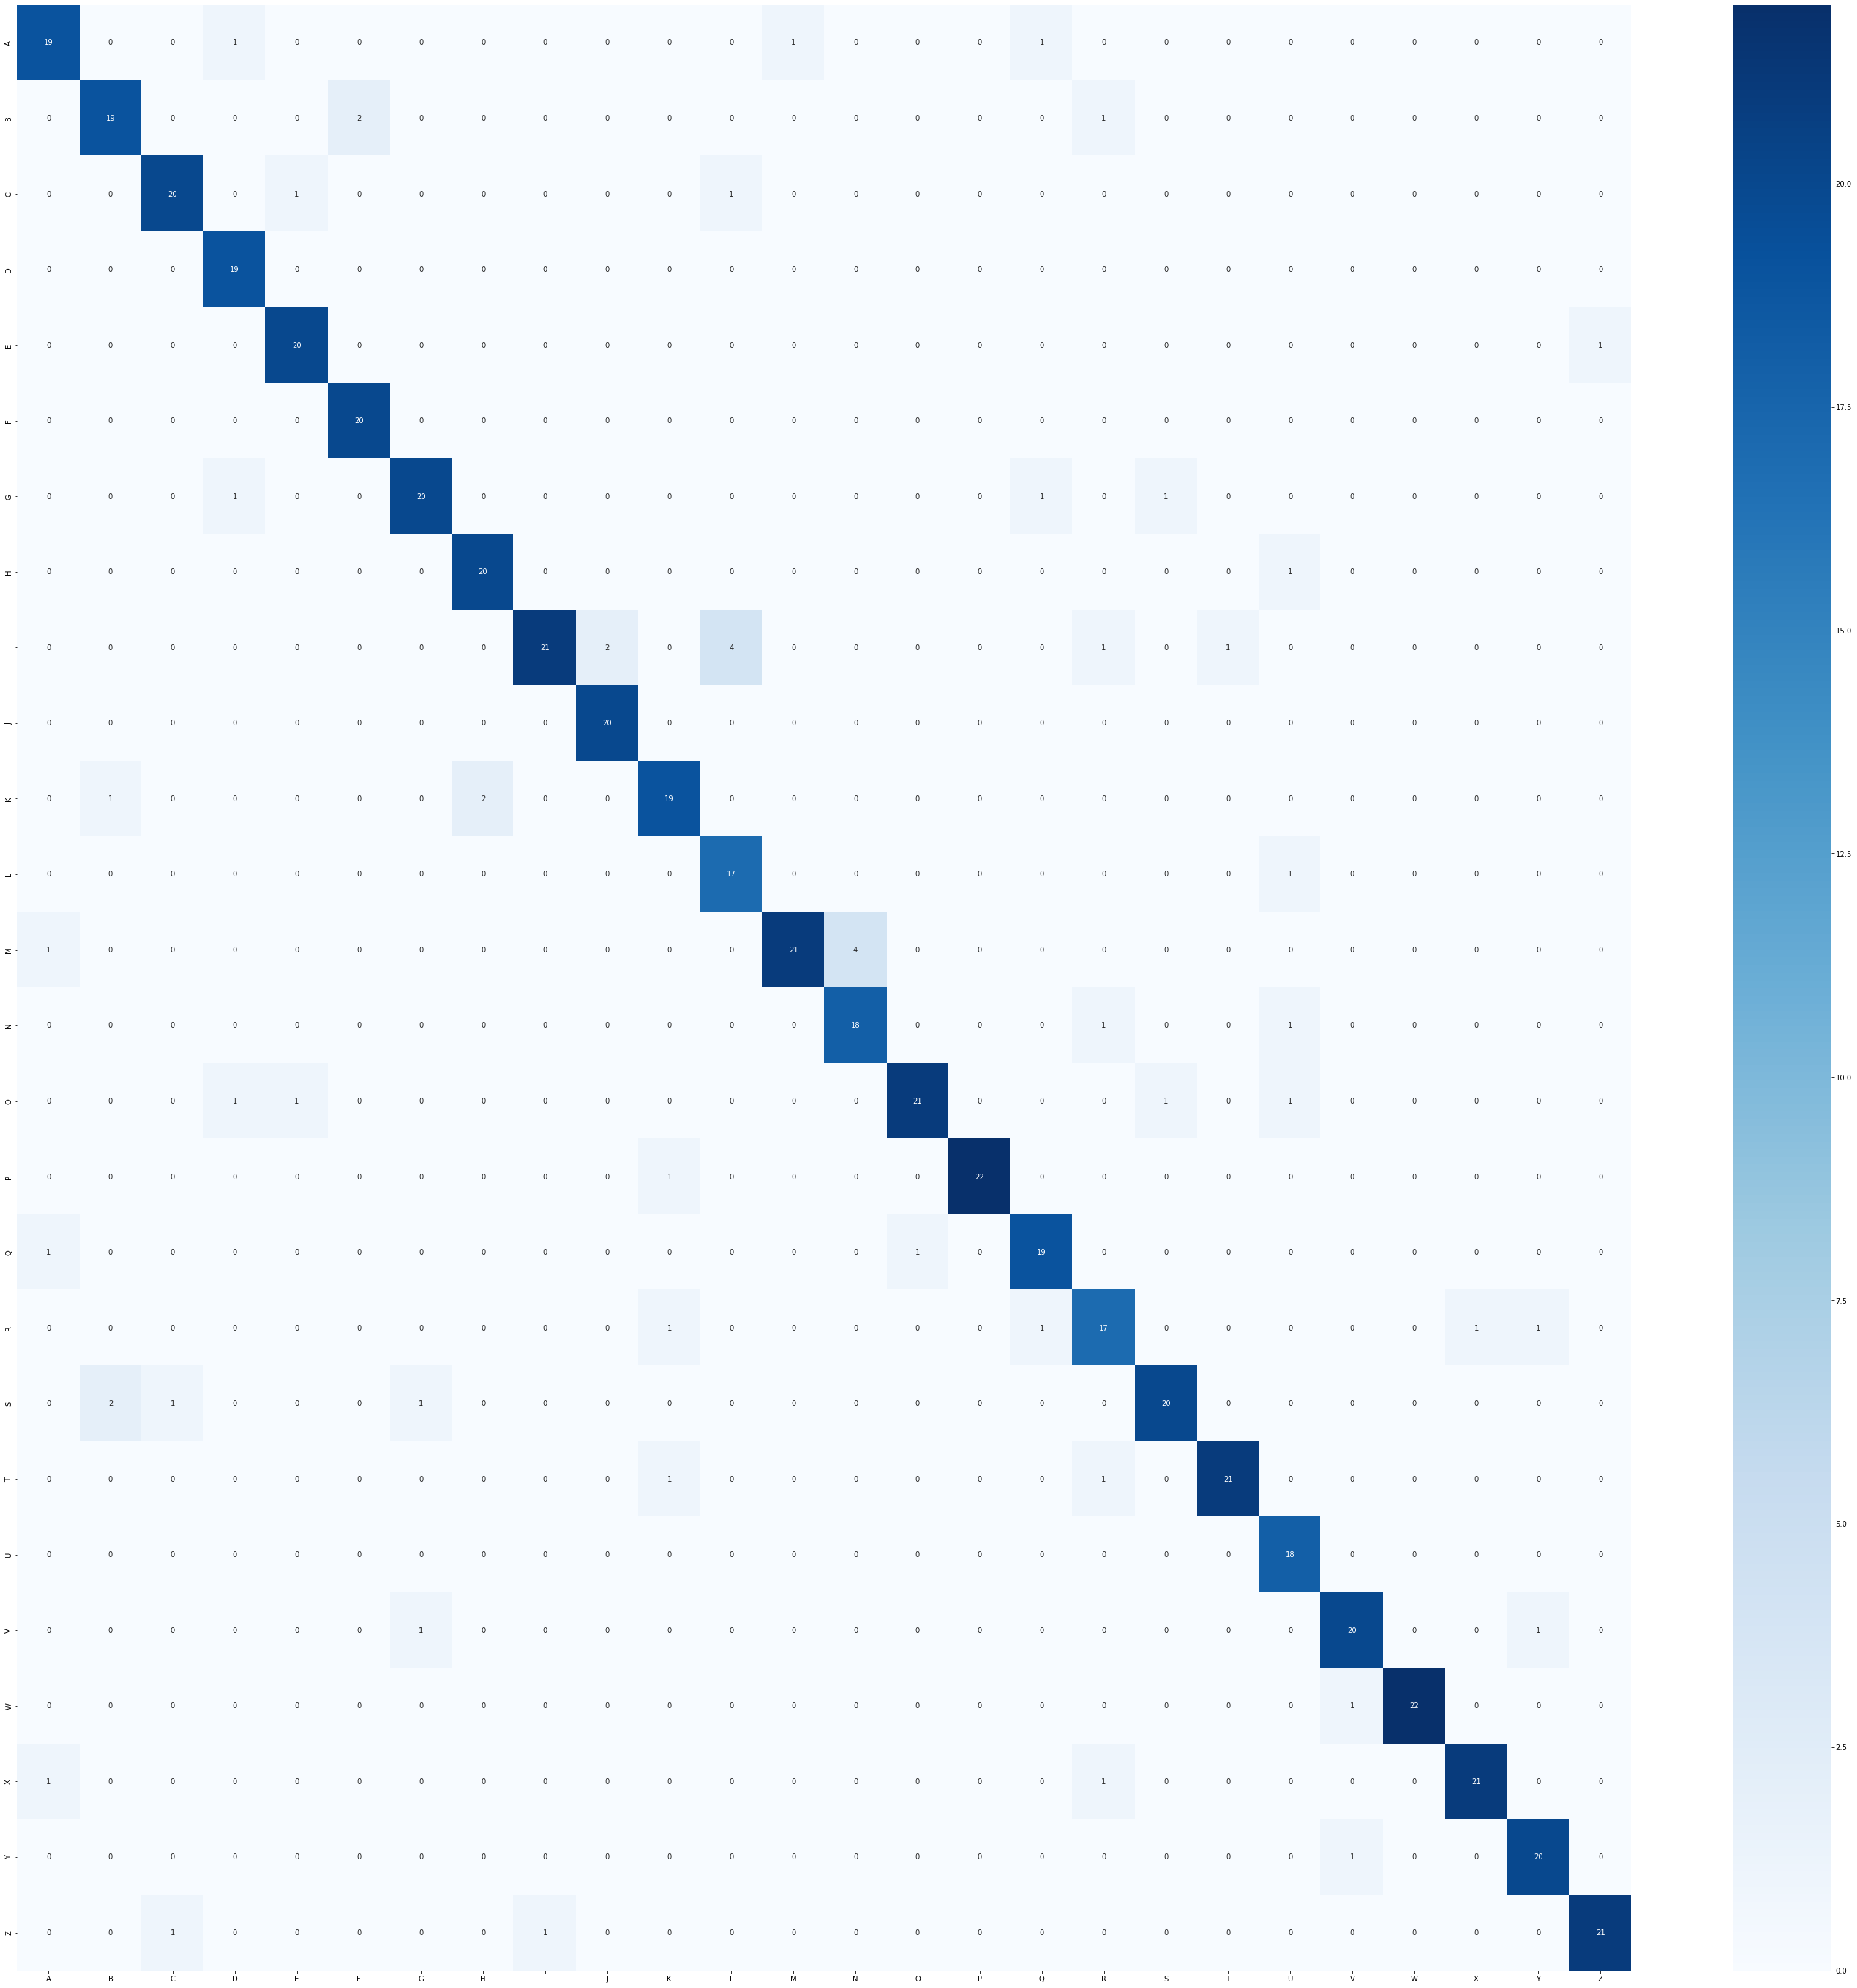

In [36]:
ypred_letters = model_letters.predict(X_test_letters)

shape1_letters = ypred_letters.shape[0]
shape2_letters = ypred_letters.shape[1]

ypred_letters = np.argmax(ypred_letters, axis=1).reshape(shape1_letters)
ytrue_letters = Y_test_letters
ytrue_letters = np.squeeze(ytrue_letters).reshape(shape1_letters)

cf_matrix = confusion_matrix(ypred_letters, ytrue_letters)
fig, ax = plt.subplots(figsize=(50,50)) 
sns.heatmap(cf_matrix, fmt='.0f', annot=True, cmap='Blues',ax=ax, xticklabels= label_dict_letters.keys(), yticklabels= label_dict_letters.keys())

In [56]:
import os
from urllib.request import urlretrieve

import tensorflow as tf

import gradio
import gradio as gr


key_list = list(label_dict_letters.keys())


#create a function to make predictions
#return a dictionary of labels and probabilities
def letters(img):
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    prediction = model_letters.predict(img).tolist()[0]
    class_names = key_list
    return {class_names[i]: prediction[i] for i in range(26)}

#set the user uploaded image as the input array
#match same shape as the input shape in the model
im = gradio.inputs.Image(shape=(IMG_WIDTH, IMG_HEIGHT), image_mode='L', invert_colors=False, source="canvas")
#setup the interface
iface = gr.Interface(
    fn = letters, 
    inputs = im, 
    outputs = gradio.outputs.Label(),
)
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://23464.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f6ba5a6ce50>,
 'http://127.0.0.1:7874/',
 'https://23464.gradio.app')

In [ ]:
def letters(img):
    img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    prediction = model_letters.predict(img).tolist()[0]
    class_names = key_list
    return {class_names[i]: prediction[i] for i in range(26)}


letters()

In [49]:
label_dict_letters
key_list = list(label_dict_letters.keys())
key_list

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']